# Business Understanding

Sarah sebagai regional sales manager ingin mengestimasi berapa banyak minyak pemanas (HeatingOil) yang harus disiapkan agar memenuhi permintaan customers baru. Dengan hal tersebut diharapkan dia dapat mengantisipasi adanya kelebihan atau kekurangan jumlah permintaan akan produk.

## Stock Level
Predictive Stock Level untuk kecukupan pelanggan baru sebanyak 42.650 pelanggan. Pelanggan yg ada (current pelanggan)

Artinya Ibu Sarah harus mencukupi ketersediaan Heating Oil untuk 42.650 + 1218


Case -- Supervised Learning -- Estimasi

Algoritma estimasi :
  1. LInear Regression
  2. ANN: MLP (Multi Layer Perception)

# Data Understanding

In [ ]:
# Memanggil Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Mengubungkan Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/DataSource/heatingOilTrainingset.csv'

In [ ]:
# Loading Data

load_heatingOil = pd.read_csv(path)

# Membentuk data frame

df = pd.DataFrame(load_heatingOil)
df.head()

,Insulation,Temperature,Heating_Oil,Num_Occupants,Avg_Age,Home_Size
0,6,74,132,4,23.8,4
1,10,43,263,4,56.7,4
2,3,81,145,2,28.0,6
3,9,50,196,4,45.1,3
4,2,80,131,5,20.8,2


# Data Preparation

In [ ]:
df.isnull().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [ ]:
df.isna().sum()

Insulation       0
Temperature      0
Heating_Oil      0
Num_Occupants    0
Avg_Age          0
Home_Size        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     1218 non-null   int64  
 1   Temperature    1218 non-null   int64  
 2   Heating_Oil    1218 non-null   int64  
 3   Num_Occupants  1218 non-null   int64  
 4   Avg_Age        1218 non-null   float64
 5   Home_Size      1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB


## Analysis Kolerasi

<Axes: title={'center': 'Pearson Correlation'}>

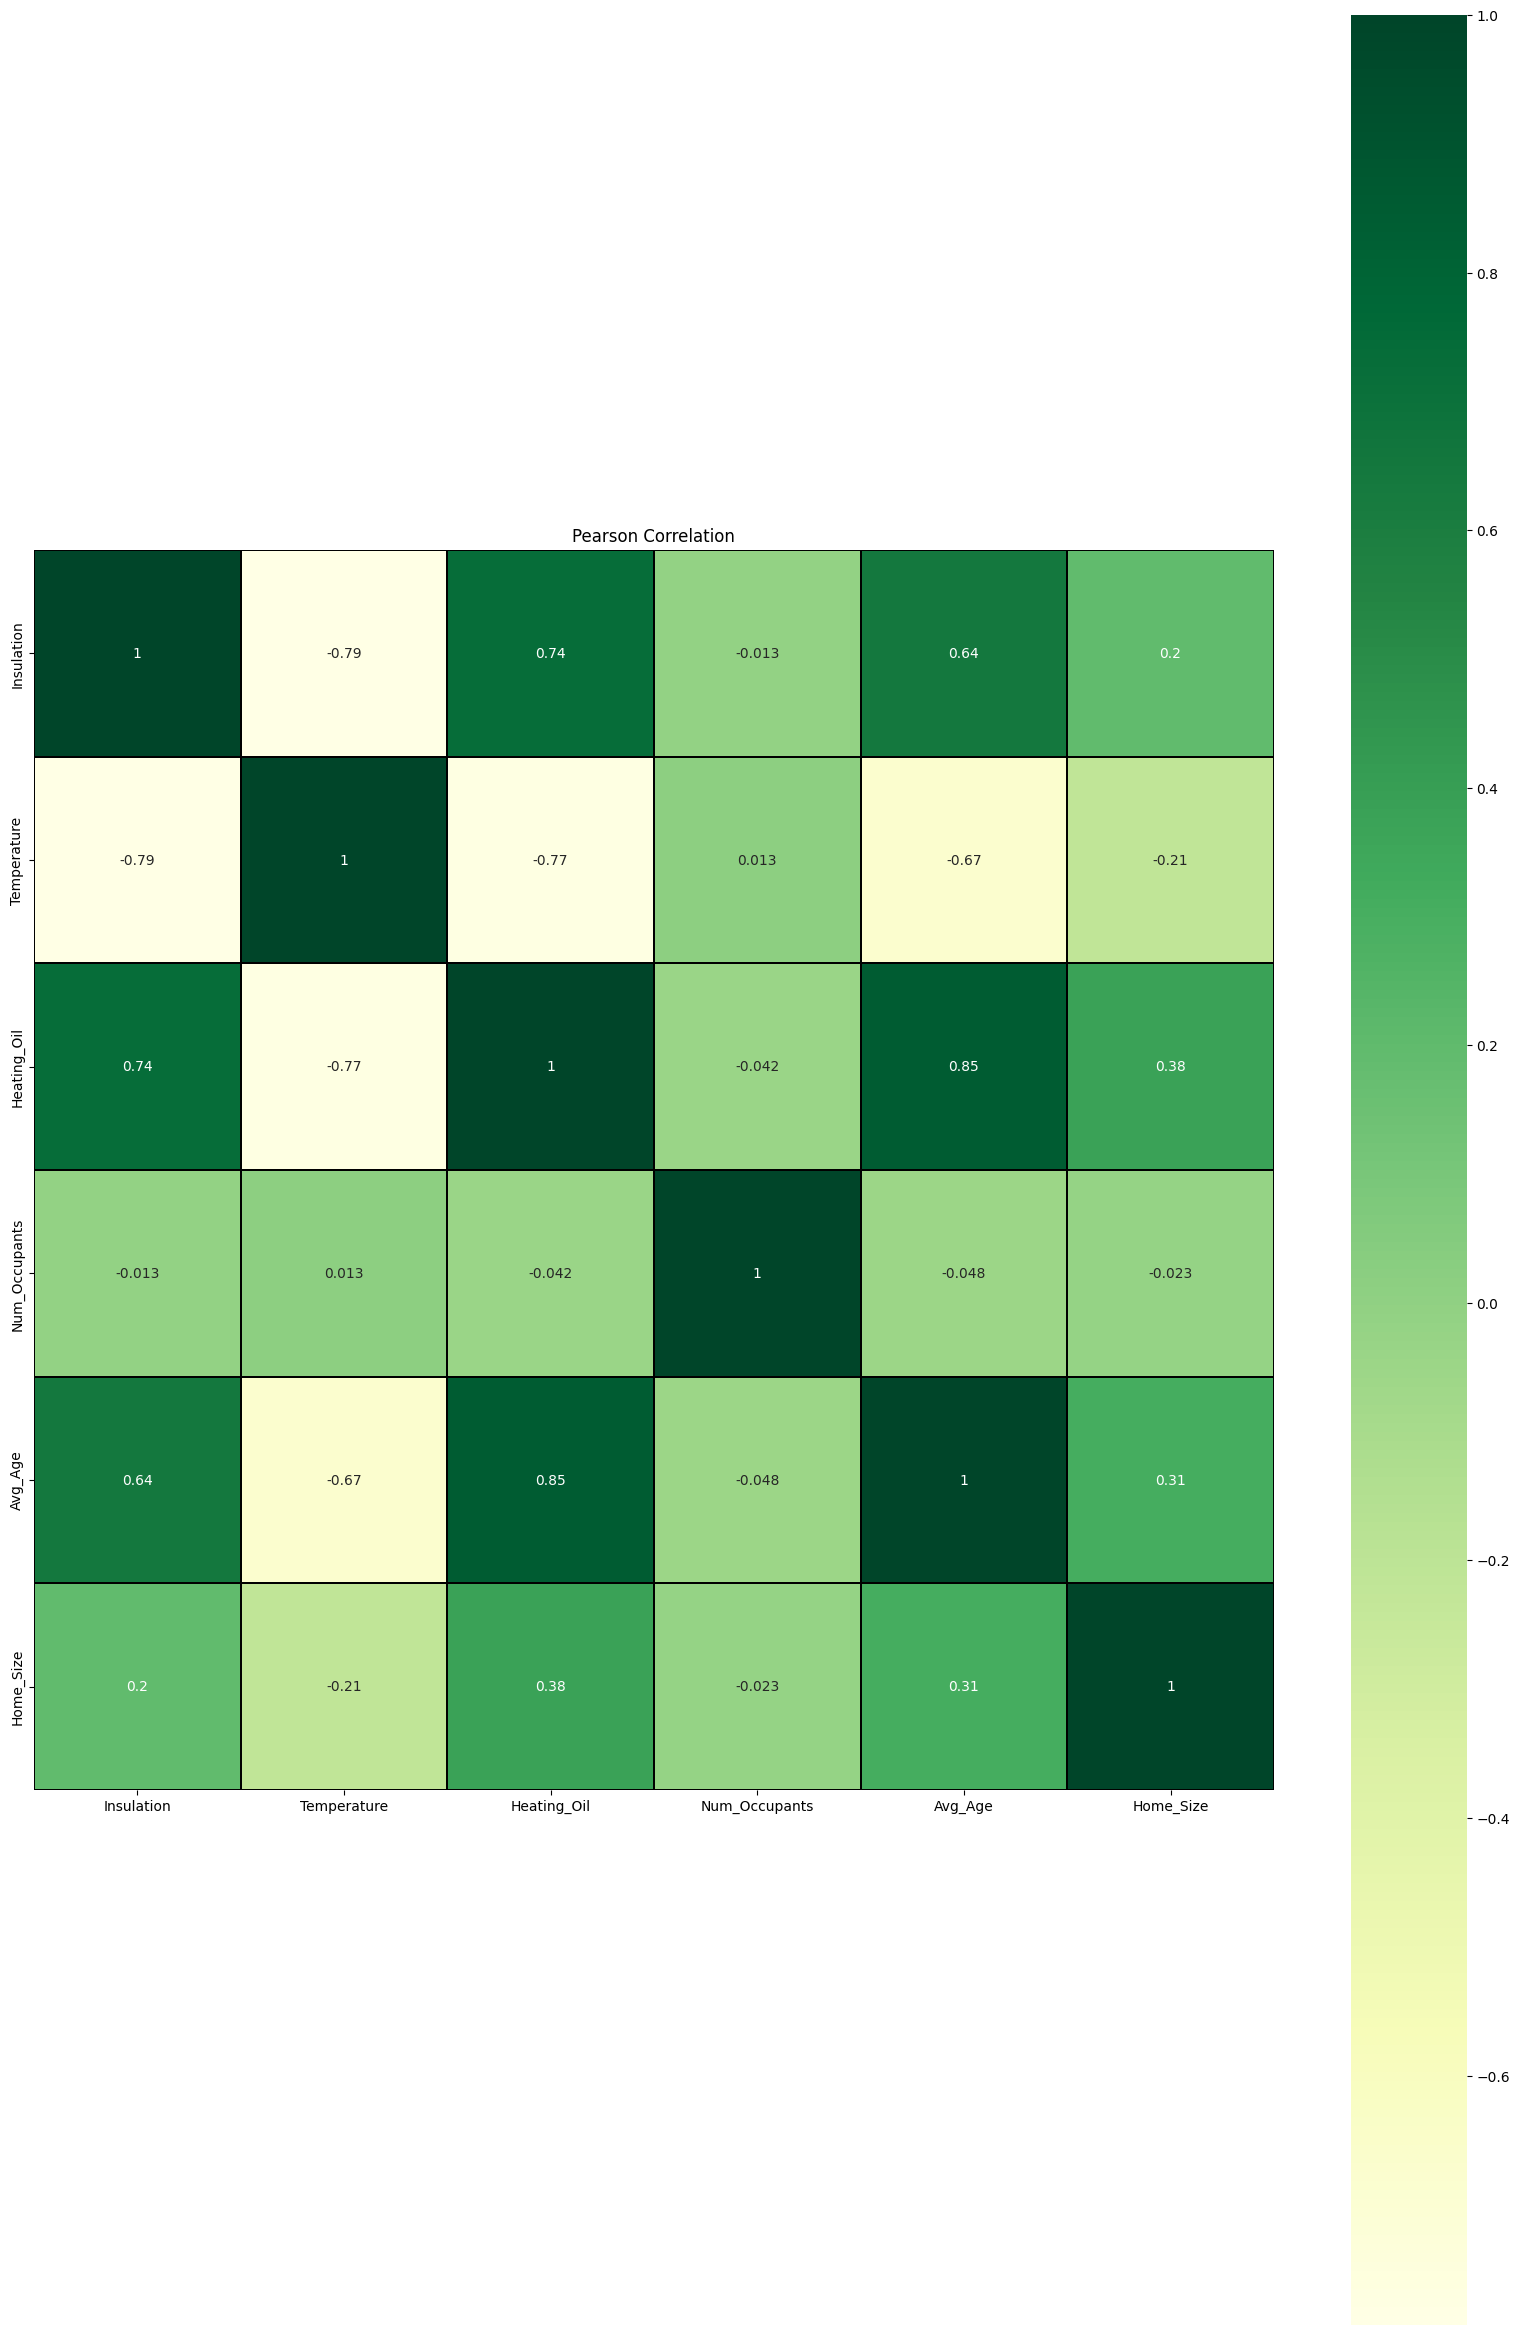

In [ ]:
f, ax = plt.subplots(figsize=(20,30))
plt.title('Pearson Correlation')
sns.heatmap(df.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap='YlGn', linecolor='black', annot=True)

## Hasil Analisis berguna untuk feature selection

Dependen Variabel : HeatingOil

1. Ada hubungan positif menguatkan antara Insulation dengan HeatingOil.
2. Ada hubungan negatif melemahkan antara temperatur dengan HeatingOil. Semakin suhunya tinggi maka kebutuhan Heating Oil semakin sedikit.
3. Ada hubungan negatif melemahkan antara num_ocupan dengan HeatingOil. Semakin banyak orang yang tinggal di dalam rumah tersebut, maka kebutuhan Heating Oil semakin sedikit. Hasil menunjukan angka 0.042 (tidak signifikan)
4. Semakin banyak/tinggi usia rata2 penghuni maka semakin tinggi kebutuhan heating oil
5. Tidak ada hubungan yang mempengaruhi scr signifikan antara home size dengan heating oil

## Data Preparation

In [ ]:
# Input variabel

x = df[['Insulation',	'Temperature', 'Avg_Age', 'Home_Size']]

# variabel target
y = df['Heating_Oil']

# Pemodelan Data

In [ ]:
#Split Training and Testing

from sklearn.model_selection import train_test_split #import train_test_split function
from sklearn import metrics #import scikit-learn metrics module for accuracy calculation

In [ ]:
# SPLIT Testing & Training ---- Supervised Learning

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

## Model Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Membuat objek Algoritma Linear Regression
ln = LinearRegression()

# Memodelkan data menggunakan algoritma linear regression
model_ln = ln.fit(x_train,y_train)

# Melakukan predict pada data test
pred_ln = model_ln.predict(x_test)

## Evaluasi Pemodelan Linear Regression

1. MAPE
2. R2
3. MAE

In [ ]:
# Untuk evaluasi model
from sklearn import metrics

In [ ]:
# NIlai R2
print('R Square :', metrics.r2_score(y_test,pred_ln))

R Square : 0.8113780027125741


In [ ]:
# Membuat Script MAPE

def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100
print('MAPE :', mean_absolut_percentage_error(y_test,pred_ln))

MAPE : 7.854285481976761


## ANN (Artificial Neural Network)

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
# ReLU : fungsi aktivasi untuk memungkinkan model menyelesaikan masalah non linier
# ReLU (Rectified Linear Unit)
mlp = MLPRegressor()

# Memodelkan Data Menggunakan Algoritma ANN
model_mlp = mlp.fit(x_train, y_train)

# Melakukan predict pada data test
pred_mlp = model_mlp.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# NIlai R2
print('R Square :', metrics.r2_score(y_test,pred_mlp))

R Square : 0.7621999255665632


In [ ]:
# Membuat Script MAPE

def mean_absolut_percentage_error(y_true,y_pred):
  y_true,y_pred=np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true))*100
print('MAPE :', mean_absolut_percentage_error(y_test,pred_mlp))

MAPE : 7.055822963123893


Karena meninjau dari evakuasi MAPE yang menilai error suatu prediksi dengan hasil lebih rendah, dirasa lebih faktual dengan data real yang ada. Jika linearitasnnya tinggi teteapi error nya besar itu terhitung sedikit overfitting.

Maka dipilih model ANN MLPRegression dengan nilai MAP = 7.4

## Implementasi Model

In [ ]:
path1 = '/content/drive/MyDrive/DataSource/heatingOilNewust.csv'

In [ ]:
load_ho = pd.read_csv(path1)
df1 = pd.DataFrame(load_ho)
df1.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size
0,5,69,10,70.1,7
1,5,80,1,66.7,1
2,4,89,9,67.8,7
3,7,81,9,52.4,6
4,4,58,8,22.9,7


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Insulation     42650 non-null  int64  
 1   Temperature    42650 non-null  int64  
 2   Num_Occupants  42650 non-null  int64  
 3   Avg_Age        42650 non-null  float64
 4   Home_Size      42650 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 1.6 MB


## Apply Model

In [ ]:
x1 = df1[['Insulation',	'Temperature', 'Avg_Age', 'Home_Size']]

In [ ]:
prediction = model_mlp.predict(x1)

prediction

array([274.61523646, 237.93682298, 259.14128249, ..., 125.37390703,
       261.72997269, 247.74080798])

In [ ]:
df_result = pd.DataFrame({'Prediction': prediction}).round(2)
df_result.head()

,Prediction
0,274.62
1,237.94
2,259.14
3,225.99
4,127.34


In [ ]:
# Menghubungan DataFrame hasil prediksi dengan DataFrame input variabel

df_pred_ho = pd.concat([df1, df_result], sort=True, axis=1)

df_pred_ho.head()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction
0,5,69,10,70.1,7,274.62
1,5,80,1,66.7,1,237.94
2,4,89,9,67.8,7,259.14
3,7,81,9,52.4,6,225.99
4,4,58,8,22.9,7,127.34


In [ ]:
df_pred_ho.describe()

,Insulation,Temperature,Num_Occupants,Avg_Age,Home_Size,Prediction
count,42650.000000,42650.000000,42650.000000,42650.000000,42650.000000,42650.000000
mean,5.989004,63.962087,5.489285,44.040131,4.495193,192.810932
std,2.575511,15.313351,2.874612,16.736901,2.290911,50.441137
min,2.000000,38.000000,1.000000,15.000000,1.000000,72.250000
25%,4.000000,51.000000,3.000000,29.500000,3.000000,151.080000
50%,6.000000,64.000000,5.000000,44.100000,4.000000,190.260000
75%,8.000000,77.000000,8.000000,58.600000,6.000000,234.310000
max,10.000000,90.000000,10.000000,73.000000,8.000000,316.080000


In [ ]:
# Eksport to CSV
# Exsport as download if in colab
from google.colab import files

# Menyimpan file/eksport file to local computer output CSV file

df_pred_ho.to_csv('df_pred_ho.csv', sep=',')
files.download('df_pred_ho.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Stock yang harus disediakan untuk New Customer = + 8.254.131 liter
## Kebutuhan Heating Oil untuk Customer yang sudah ada (current customer) = 240.426